In [1]:
import os
import json
import torch
import itertools
import statistics
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
def plot_curves_in_directory(directory, colors, linestyles, smoothing_factor, start=None, end=None):
    metrics = {}
    sizes = {}
    metrics_per_size = {}
    for filename in os.listdir(directory):
        if filename.startswith("gpt2-") and filename.endswith(".pth"):
            file = os.path.join(str(directory), filename)
            size = os.path.getsize(file)
            recorder = torch.load(file, weights_only=False)['recorder']
            recorder.smoothing_factor = smoothing_factor
            loss_curve = recorder.smooth_metrics['eval/loss']
            loss_curve = sorted(loss_curve.items())
            loss_curve = [v for (k,v) in loss_curve]
            loss_curve = loss_curve[start:end]
            filename = filename.strip(".pth")
            metrics[filename] = loss_curve
            sizes[filename] = size
            metrics_per_size[filename] = [v / (v + size) for v in loss_curve]
    keys = sorted(list(metrics.keys()))
    lengths = [len(metrics[key]) for key in keys]
    all_metrics = sum([metrics[key] for key in keys], [])
    max_len = max(lengths)
    max_value = max(all_metrics)
    min_value = min(all_metrics)
    iterations = list(range(0,max_len*10,10))
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    max_key_len = max(len(key) for key in keys)
    for key, color, linestyle in zip(keys, colors, linestyles):
        keyw = key.ljust(max_key_len + 4)
        # adjust the label
        if 'softplus' in keyw:
            keyw += '  '
        label = keyw + " final_loss : {:.2f}".format(metrics[key][-1])
        ax.plot(iterations, metrics[key], marker='', color=color, label=label, linestyle=linestyle)
        print(keyw, metrics[key][-1])
    ax.legend()
    plt.rc('legend',fontsize=12)
    plt.xlabel('iterations', fontsize=12)
    plt.ylabel('cross entropy loss', fontsize=12)
    #plt.rcParams["figure.figsize"] = (20, 20)
    plt.savefig('eval_loss_curves.png', bbox_inches='tight')
    # plt.show()

gpt2-softmax[naive]-layers4-dim128-heads4-seqlen2048-batchsize32-steps160000     4.2538704823873035
gpt2-softplus-layers4-dim128-coredim128-seqlen2048-batchsize32-steps160000         4.083420348209719
gpt2-softplus-layers4-dim128-coredim424-seqlen2048-batchsize32-steps160000         3.4570717532394437


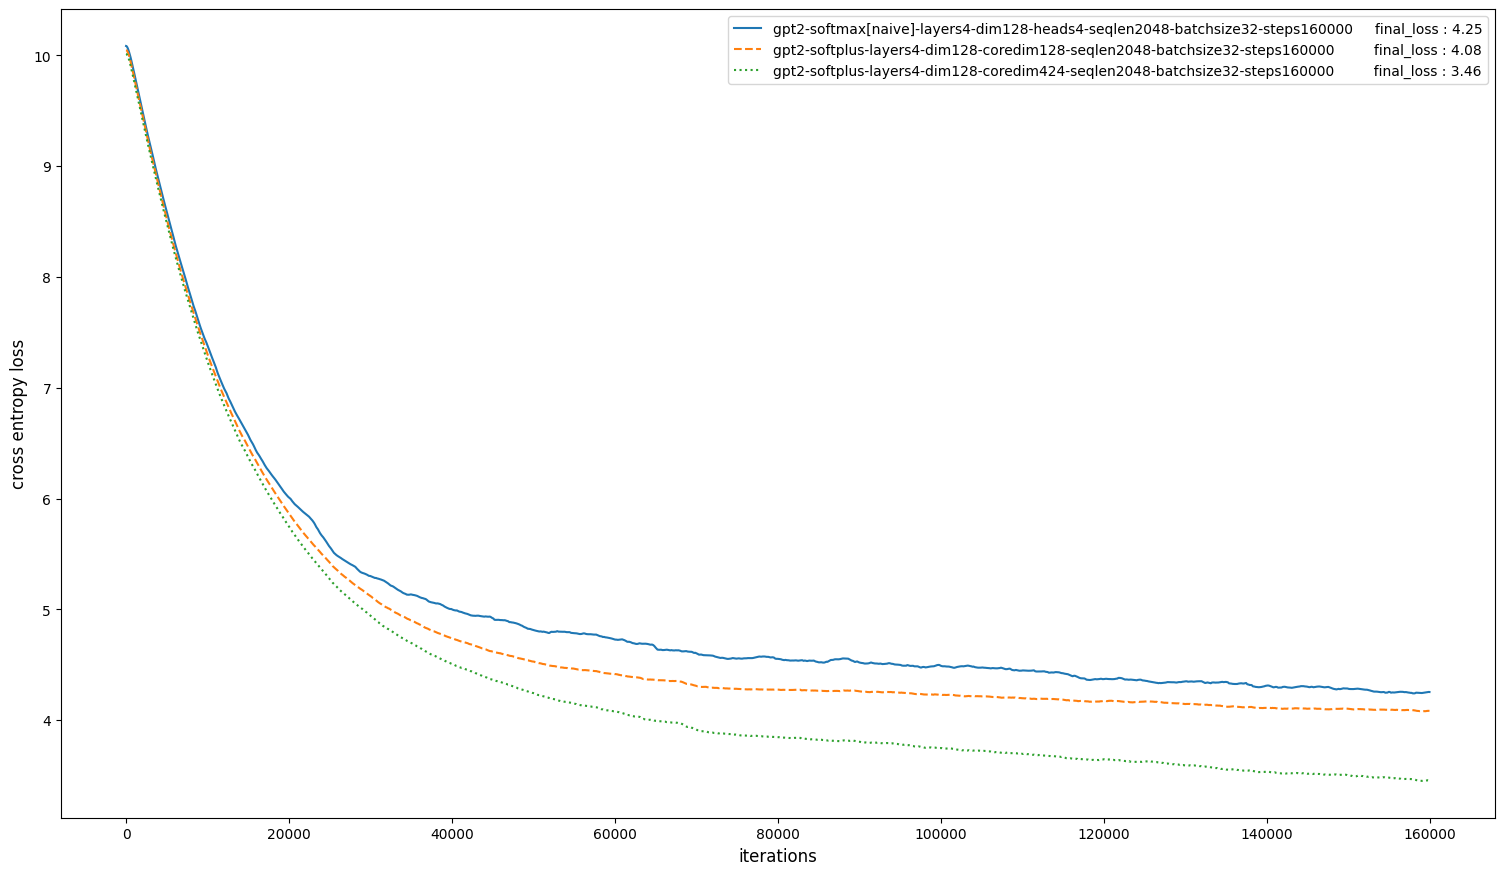

In [4]:
plot_curves_in_directory('/workspace/gpt2_pyt/', mcolors.TABLEAU_COLORS, ['-', '--', ':', '-.'], 0.999)